# Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

# Introduction: Business Problem <a name="introduction"></a>

Surabaya is a big city of Indonesia. Instead of Jakarta, capital cities of Indonesia, Surabaya are second biggest cities in Indonesia. With big city, of course we should expect high about the developing program. With 326.81 km squared of areas region of Surabaya, actually we should hoping that building development is quite fast.

Since there are so many building we can develop, such as restaurant, coffee shops, supermarket, etc that can helping for financial of Surabaya, because with growing businesses, of course many people would get a job, and decrease people who don't have job.

My problem is how we can know which neighborhood that is very crowded with building, and which is less crowded, so that we can create more and more building.

# Data <a name="data"></a>
Based on problem above, we need so much data about Surabaya itself and Foursquare API to helping us know what is nearby that area. So data sources we needed is:
- Data of areas region of every neighborhood on Surabaya
- Data of latitude and longitude of every neighborhood on Surabaya
- Data of Foursquare API for understanding what building in radius of every neighborhood on Surabaya

So, gather the data !

## Data of Areas Region of Surabaya
In order to find areas region of Surabaya, I am looking in internet and find the resources from [here](https://surabayakota.bps.go.id/statictable/2015/02/11/49/luas-wilayah-dan-kepadatan-penduduk-menurut-kecamatan-hasil-sensus-penduduk.html), BPS (Badan Pusat Statistik) or Statistical Center Data of Surabaya for the data. Because we can't downloaded it, so we need to scrape it.

In [77]:
# first, import requests 
import requests

In [78]:
# gather the data from link itself
website_url = requests.get('https://surabayakota.bps.go.id/statictable/2015/02/11/49/luas-wilayah-dan-kepadatan-penduduk-menurut-kecamatan-hasil-sensus-penduduk.html').text

In [79]:
# using beautifulsoup to gather the data
from bs4 import BeautifulSoup
soup = BeautifulSoup(website_url,'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html class="sb-init" lang="en">
 <head>
  <!-- Meta -->
  <meta charset="utf-8"/>
  <link href="/assets/5bb2d137/mprint.css" media="print" rel="stylesheet" type="text/css"/>
  <link href="https://surabayakota.bps.go.id/assets/9c7d751c/mbmenu.css;waa601fe43600a2edf" media="screen" rel="stylesheet" type="text/css"/>
  <link href="https://surabayakota.bps.go.id/assets/94eb9a27/jquery.fancybox.css;wa72675903621f2b31" rel="stylesheet" type="text/css"/>
  <link href="https://surabayakota.bps.go.id/assets/94eb9a27/helpers/jquery.fancybox-thumbs.css;waf5937b3eab07e0f6" rel="stylesheet" type="text/css"/>
  <script src="/assets/43876925/jquery.min.js" type="text/javascript">
  </script>
  <script src="/assets/5bb2d137/mPrint.js" type="text/javascript">
  </script>
  <script src="https://surabayakota.bps.go.id/assets/94eb9a27/jquery.fancybox.pack.js;wa2f793c87271f38fd" type="text/javascript">
  </script>
  <script type="text/javascript">
   /*<![CDATA[*/
 	function sosial(){
				

In [80]:
# get the table class
my_table = soup.find('table',{'class':'excel'})
my_table

<table cellspacing="0" class="excel"><tbody>
<tr style="height:20px;">
<td colspan="6" style="font-family:Arial;text-align:center;font-size:10px;font-weight:bold;"><nobr>Luas Wilayah dan Kepadatan Penduduk Menurut Kecamatan Hasil Sensus Penduduk</nobr></td></tr>
<tr style="height:20px;">
<td colspan="6" style="font-family:Arial;text-align:center;font-size:10px;font-style:italic;"><nobr>Areaâ��s Region Taken from Population Density by Sub District Taken from Population Cencuss </nobr></td></tr>
<tr style="height:21px;">
<td colspan="6" style="text-align:center;border-bottom:2px solid;border-bottom-color:#000000;"><nobr>1990, 2000 and 2010</nobr></td></tr>
<tr style="height:20px;">
<td colspan="2" style="font-family:Arial;text-align:center;font-size:10px;background-color:#CCCCFF;font-weight:bold;border-top:2px solid;border-top-color:#000000;"><nobr>Kecamatan/</nobr></td>
<td style="font-family:Arial;text-align:center;font-size:10px;background-color:#CCCCFF;font-weight:bold;border-top:2px

In [81]:
# get every rows of the data, no matter when they have spaces or not, just do it
a = []
b = []
c = []
for items in soup.find('table', class_='excel').find_all('tr')[1::1]:
    data = items.find_all(['th','td']) # looking for rows
    try:
        one = data[0].text # get text only
        two = data[1].text
        three = data[2].text
        a.append(one) # append to a list so that we can called into DataFrame
        b.append(two)
        c.append(three)
    except IndexError:pass

In [82]:
# import our package that are needed for data science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
# let's create DataFrame
data = pd.DataFrame({'Number':a, 'Neighborhood':b, 'Area Region':c})
data

Number      Neighborhood Area Region
0                Kecamatan/     Luas Wilayah/        1990
1                                                   (Km²)
2                       (1)               (2)         (3)
3                                                        
4                              Surabaya Pusat            
5                         1         Tegalsari        4.29
6                       02.           Genteng        4.05
7                       03.           Bubutan        3.86
8                       04.         Simokerto        2.59
9                              Surabaya Utara            
10                      05.   Pabean Cantikan         6.8
11                      06.          Semampir        8.76
12                      07.        Krembangan        8.34
13                      08.          Kenjeran        7.77
14                      09.           Bulak*)        6.72
15                             Surabaya Timur            
16                      10.        Tambaksari        8.99
17                      11.            Gubeng        7.99
18                      12.           Rungkut       21.08
19                      13.  Tenggilis Mejoyo        5.52
20                      14.      Gunung Anyar        9.71
21                      15.          Sukolilo       23.68
22                      16.         Mulyorejo       14.21
23                           Surabaya Selatan            
24                      17.           Sawahan        6.93
25                      18.         Wonokromo        8.47
26                      19.      Karangpilang        9.23
27                      20.       Dukuh Pakis        9.94
28                      21.            Wiyung       12.46
29                      22.          Wonocolo        6.77
30                      23.          Gayungan        6.07
31                      24.         Jambangan        4.19
32                             Surabaya Barat            
33                      25.            Tandes       11.07
34                      26.     Sukomanunggal        9.23
35                      27.          Asemrowo       15.44
36                      28.            Benowo       23.73
37                      29.           Pakal*)       22.07
38                      30.       Lakarsantri       18.99
39                      31.      Sambikerep*)       23.68
40                                                       
41  Jumlah/Total                       326.81      10,126
42                                                       
43                                                       
44                                                       
45                                                       
46

All of data we needed is gathered, but because the data is so dirty, we need to clean it.

In [84]:
# to make sure what kind of value in column Area Region
data['Area Region'].unique()

array(['1990', '(Km²)', '(3)', '\xa0', '4.29', '4.05', '3.86', '2.59',
       '6.8', '8.76', '8.34', '7.77', '6.72', '8.99', '7.99', '21.08',
       '5.52', '9.71', '23.68', '14.21', '6.93', '8.47', '9.23', '9.94',
       '12.46', '6.77', '6.07', '4.19', '11.07', '15.44', '23.73',
       '22.07', '18.99', '10,126'], dtype=object)

In [85]:
# cleaning rows that we don't need
data = data[4:40]
data = data.reset_index(drop=True)
data.head()

Number    Neighborhood Area Region
0         Surabaya Pusat            
1      1       Tegalsari        4.29
2    02.         Genteng        4.05
3    03.         Bubutan        3.86
4    04.       Simokerto        2.59

In [86]:
# get out data that doesn't have area region and not using Number column
data = data[data['Area Region'] != '\xa0']
data = data[['Neighborhood','Area Region']]
data

Neighborhood Area Region
1          Tegalsari        4.29
2            Genteng        4.05
3            Bubutan        3.86
4          Simokerto        2.59
6    Pabean Cantikan         6.8
7           Semampir        8.76
8         Krembangan        8.34
9           Kenjeran        7.77
10           Bulak*)        6.72
12        Tambaksari        8.99
13            Gubeng        7.99
14           Rungkut       21.08
15  Tenggilis Mejoyo        5.52
16      Gunung Anyar        9.71
17          Sukolilo       23.68
18         Mulyorejo       14.21
20           Sawahan        6.93
21         Wonokromo        8.47
22      Karangpilang        9.23
23       Dukuh Pakis        9.94
24            Wiyung       12.46
25          Wonocolo        6.77
26          Gayungan        6.07
27         Jambangan        4.19
29            Tandes       11.07
30     Sukomanunggal        9.23
31          Asemrowo       15.44
32            Benowo       23.73
33           Pakal*)       22.07
34       Lakarsantri       18.99
35      Sambikerep*)       23.68

In [87]:
# because there are *) in some values on Neighborhood column, let's delete it
data = data.reset_index(drop=True)
for i in range(len(data)):
    dat = data['Neighborhood'][i]
    strings = dat.translate({ord('*'): None}) # to replace * into None, so it deletes *
    data['Neighborhood'][i] = strings
    
for i in range(len(data)):
    dat = data['Neighborhood'][i]
    strings = dat.translate({ord(')'): None}) # to replace ) into None, so it deletes )
    data['Neighborhood'][i] = strings

In [88]:
data

Neighborhood Area Region
0          Tegalsari        4.29
1            Genteng        4.05
2            Bubutan        3.86
3          Simokerto        2.59
4    Pabean Cantikan         6.8
5           Semampir        8.76
6         Krembangan        8.34
7           Kenjeran        7.77
8              Bulak        6.72
9         Tambaksari        8.99
10            Gubeng        7.99
11           Rungkut       21.08
12  Tenggilis Mejoyo        5.52
13      Gunung Anyar        9.71
14          Sukolilo       23.68
15         Mulyorejo       14.21
16           Sawahan        6.93
17         Wonokromo        8.47
18      Karangpilang        9.23
19       Dukuh Pakis        9.94
20            Wiyung       12.46
21          Wonocolo        6.77
22          Gayungan        6.07
23         Jambangan        4.19
24            Tandes       11.07
25     Sukomanunggal        9.23
26          Asemrowo       15.44
27            Benowo       23.73
28             Pakal       22.07
29       Lakarsantri       18.99
30        Sambikerep       23.68

First data is ready.

## Data Latitude and Longitude of Neighborhood of Surabaya
For this one, I am looking on internet again and find data on Github [here](https://raw.githubusercontent.com/yusufsyaifudin/wilayah-indonesia/master/data/list_of_area/districts.json). Thanks for Yusuf Syaifudin who made this. So basically this is all of the district of Indonesia, and we can gathered Surabaya only.

In [89]:
# read json file
data_sby = pd.read_json('data/districts.json')
data_sby

alt_name       id   latitude  \
0       South Teupah, Simeulue Regency, Aceh, Indonesia  1101010   2.386030   
1      East Simeulue, Simeulue Regency, Aceh, Indonesia  1101020   2.514380   
2        West Teupah, Simeulue Regency, Aceh, Indonesia  1101021   2.505000   
3     Teupah Tengah, Kabupaten Simeulue, Aceh, Indon...  1101022   2.415940   
4     Central Simeulue Sub-District, Simeulue Regenc...  1101030   2.624120   
5     Teluk Dalam, South Nias Regency, North Sumatra...  1101031   0.605230   
6     Simeulue Cut, Kabupaten Simeulue, Aceh, Indonesia  1101032   2.599970   
7             Salang, Simeulue Regency, Aceh, Indonesia  1101040   2.664450   
8      West Simeulue, Simeulue Regency, Aceh, Indonesia  1101050   2.783000   
9             Alafan, Simeulue Regency, Aceh, Indonesia  1101051   2.783840   
10    Banyak Island, Aceh Singkil Regency, Aceh, Ind...  1102010   2.319890   
11    West Banyak Island, Aceh Singkil Regency, Aceh...  1102011   2.147210   
12       Singkil, Aceh Singkil Regency, Aceh, Indonesia  1102020   2.283610   
13    North Singkil, Aceh Singkil Regency, Aceh, Ind...  1102021   2.299690   
14    Kuala Baru, Aceh Singkil Regency, Aceh, Indonesia  1102022   2.389100   
15    Simpang Kanan, Rokan Hilir Regency, Riau, Indo...  1102030   1.859520   
16    Gunung Meriah, Deli Serdang Regency, North Sum...  1102031   3.121770   
17    Danau Paris, Aceh Singkil Regency, Aceh, Indon...  1102032   2.298950   
18    Suro, Kalibagor, Banyumas Regency, Central Jav...  1102033  -7.490360   
19     Singkohor, Aceh Singkil Regency, Aceh, Indonesia  1102042   2.534930   
20         Banjarbaru City, South Kalimantan, Indonesia  1102043  -3.466700   
21          Trumon, South Aceh Regency, Aceh, Indonesia  1103010   2.634440   
22     East Trumon, South Aceh Regency, Aceh, Indonesia  1103011   2.890600   
23    Central Trumon, South Aceh Regency, Aceh, Indo...  1103012   2.901470   
24        Bakongan, South Aceh Regency, Aceh, Indonesia  1103020   2.962240   
25    East Bakongan, South Aceh Regency, Aceh, Indon...  1103021   2.902050   
26    Bahagia City, South Aceh Regency, Aceh, Indonesia  1103022   3.011330   
27     South Kluet, South Aceh Regency, Aceh, Indonesia  1103030   3.051660   
28      East Kluet, South Aceh Regency, Aceh, Indonesia  1103031   3.171040   
29     North Kluet, South Aceh Regency, Aceh, Indonesia  1103040   3.122100   
30      Pasie Raja, South Aceh Regency, Aceh, Indonesia  1103041   3.202100   
31    Central Kluet, South Aceh Regency, Aceh, Indon...  1103042   3.431890   
32      Tapak Tuan, South Aceh Regency, Aceh, Indonesia  1103050   3.261560   
33        Sama Dua, South Aceh Regency, Aceh, Indonesia  1103060   3.342690   
34          Sawang, North Aceh Regency, Aceh, Indonesia  1103070   5.044090   
35          Meukek, South Aceh Regency, Aceh, Indonesia  1103080   3.593120   
36    Labuhan Haji, East Lombok Regency, West Nusa T...  1103090  -8.647250   
37    East Labuhan Haji, South Aceh Regency, Aceh, I...  1103091   3.603940   
38    West Labuhan Haji, South Aceh Regency, Aceh, I...  1103092   3.584990   
39    Lawe Alas, Aceh Tenggara Regency, Aceh, Indonesia  1104010   3.437860   
40                                         BABUL RAHMAH  1104011        NaN   
41    Tanoh Alas, Aceh Tenggara Regency, Aceh, Indon...  1104012   3.269280   
42    Lawe Sigala-Gala, Aceh Tenggara Regency, Aceh,...  1104020   3.356980   
43    Babul Makmur, Aceh Tenggara Regency, Aceh, Ind...  1104021   3.316510   
44      Semadam, Aceh Tenggara Regency, Aceh, Indonesia  1104022   3.392270   
45       Lauser, Aceh Tenggara Regency, Aceh, Indonesia  1104023   3.127690   
46       Bambel, Aceh Tenggara Regency, Aceh, Indonesia  1104030   3.457160   
47    Bukit Tusam, Aceh Tenggara Regency, Aceh, Indo...  1104031   3.412440   
48    Lawe Sumur, Aceh Tenggara Regency, Aceh, Indon...  1104032   3.482320   
49    Babussalam, Aceh Tenggara Regency, Aceh, Indon...  1104040   3.493070   
50    Lawe Bulan, 

After searching, I can get where Surabaya data is, in **regency_id** equals 3578.

In [90]:
data_sby = data_sby[data_sby['regency_id'] == 3578]
data_sby = data_sby.reset_index(drop=True)
data_sby

alt_name       id  latitude  \
0   Karang Pilang, Surabaya City, East Java, Indon...  3578010  -7.33778   
1      Jambangan, Surabaya City, East Java, Indonesia  3578020  -7.32108   
2       Gayungan, Surabaya City, East Java, Indonesia  3578030  -7.33084   
3       Wonocolo, Surabaya City, East Java, Indonesia  3578040  -7.31982   
4   Tenggilis Mejoyo, Surabaya City, East Java, In...  3578050  -7.32423   
5   Gunung Anyar, Surabaya City, East Java, Indonesia  3578060  -7.33916   
6        Rungkut, Surabaya City, East Java, Indonesia  3578070  -7.31902   
7       Sukolilo, Surabaya City, East Java, Indonesia  3578080  -7.28818   
8      Mulyorejo, Surabaya City, East Java, Indonesia  3578090  -7.26931   
9         Gubeng, Surabaya City, East Java, Indonesia  3578100  -7.27891   
10     Wonokromo, Surabaya City, East Java, Indonesia  3578110  -7.30266   
11   Dukuh Pakis, Surabaya City, East Java, Indonesia  3578120  -7.29684   
12        Wiyung, Surabaya City, East Java, Indonesia  3578130  -7.31526   
13   Lakarsantri, Surabaya City, East Java, Indonesia  3578140  -7.31651   
14    Sambikerep, Surabaya City, East Java, Indonesia  3578141  -7.27684   
15        Tandes, Surabaya City, East Java, Indonesia  3578150  -7.25544   
16  Suko Manunggal, Surabaya City, East Java, Indo...  3578160  -7.26426   
17       Sawahan, Surabaya City, East Java, Indonesia  3578170  -7.26301   
18  Tegalsari, Tegalrejo, Tegalsari, Banyuwangi Re...  3578180  -8.40185   
19  Genteng, Genteng Kulon, Genteng, Kabupaten Ban...  3578190  -8.36658   
20    Tambaksari, Surabaya City, East Java, Indonesia  3578200  -7.25044   
21      Kenjeran, Surabaya City, East Java, Indonesia  3578210  -7.22027   
22         Bulak, Surabaya City, East Java, Indonesia  3578211  -7.23677   
23     Simokerto, Surabaya City, East Java, Indonesia  3578220  -7.23865   
24      Semampir, Surabaya City, East Java, Indonesia  3578230  -7.21146   
25  Pabean Cantian, Surabaya City, East Java, Indo...  3578240  -7.21475   
26       Bubutan, Surabaya City, East Java, Indonesia  3578250  -7.24996   
27    Krembangan, Surabaya City, East Java, Indonesia  3578260  -7.23015   
28      Asemrowo, Surabaya City, East Java, Indonesia  3578270  -7.23469   
29        Benowo, Surabaya City, East Java, Indonesia  3578280  -7.22649   
30         Pakal, Surabaya City, East Java, Indonesia  3578281  -7.22835   

    longitude              name  regency_id  
0   112.68840     KARANG PILANG        3578  
1   112.71819         JAMBANGAN        3578  
2   112.72415          GAYUNGAN        3578  
3   112.74203          WONOCOLO        3578  
4   112.75394  TENGGILIS MEJOYO        3578  
5   112.80459      GUNUNG ANYAR        3578  
6   112.80459           RUNGKUT        3578  
7   112.81651          SUKOLILO        3578  
8   112.79268         MULYOREJO        3578  
9   112.75394            GUBENG        3578  
10  112.73309         WONOKROMO        3578  
11  112.70032       DUKUH PAKIS        3578  
12  112.68542            WIYUNG        3578  
13  112.66158       LAKARSANTRI        3578  
14  112.64966        SAMBIKEREP        3578  
15  112.67350            TANDES        3578  
16  112.69734    SUKO MANUNGGAL        3578  
17  112.72117           SAWAHAN        3578  
18  114.11810         TEGALSARI        3578  
19  114.14630           GENTENG        3578  
20  112.76884        TAMBAKSARI        3578  
21  112.76884          KENJERAN        3578  
22  112.78970             BULAK        3578  
23  112.75394         SIMOKERTO        3578  
24  112.74501          SEMAMPIR        3578  
25  112.73011    PABEAN CANTIAN        3578  
26  112.73011           BUBUTAN        3578  
27  112.72415        KREMBANGAN        3578  
28  112.68542          ASEMROWO        3578  
29  112.64966            BENOWO        3578  
30  112.61391             PAKAL        3578

Ah, I forget to compare shape of first data and this data to make sure that it is same.

In [91]:
print('First data have',data.shape[0],'neighborhood')
print('Second data have',data_sby.shape[0],'neighborhood')

First data have 31 neighborhood
Second data have 31 neighborhood


Because it has same rows, keep going.

In [92]:
# drop alt_name, regency_id, and id
data_sby = data_sby.drop(['alt_name', 'id','regency_id'], axis = 1)
data_sby.head()

latitude  longitude              name
0  -7.33778  112.68840     KARANG PILANG
1  -7.32108  112.71819         JAMBANGAN
2  -7.33084  112.72415          GAYUNGAN
3  -7.31982  112.74203          WONOCOLO
4  -7.32423  112.75394  TENGGILIS MEJOYO

Because on first data is capitalized on Neighborhood, we should change our **data_sby** into same way.

In [93]:
data_sby['name'] = data_sby['name'].str.title()
data_sby.head()

latitude  longitude              name
0  -7.33778  112.68840     Karang Pilang
1  -7.32108  112.71819         Jambangan
2  -7.33084  112.72415          Gayungan
3  -7.31982  112.74203          Wonocolo
4  -7.32423  112.75394  Tenggilis Mejoyo

Let's check is it name is exactly same or there are some different names.

In [94]:
# create unique names from each name
aaa = data['Neighborhood'].unique().tolist()
aaa.sort()
bbb = data_sby['name'].unique().tolist()
bbb.sort()

# iterate to know is it any difference
for i in range(0,31):
    if aaa[i] in bbb:
        print("ok")
    else:
        print(aaa[i],"different with",bbb[i])

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
Karangpilang different with Karang Pilang
ok
ok
ok
ok
Pabean Cantikan different with Pabean Cantian
ok
ok
ok
ok
ok
ok
ok
Sukomanunggal different with Sukolilo
ok
ok
ok
ok
ok
ok
ok


Nah, we have 3 difference, let's fixed it.

In [95]:
data_sby = data_sby.replace({'name':'Karang Pilang'},'Karangpilang')
data_sby = data_sby.replace({'name':'Pabean Cantian'},'Pabean Cantikan')
data_sby = data_sby.replace({'name':'Suko Manunggal'},'Sukomanunggal')

Check again.

In [96]:
# create unique names from each name
aaa = data['Neighborhood'].unique().tolist()
aaa.sort()
bbb = data_sby['name'].unique().tolist()
bbb.sort()

# iterate to know is it any difference
for i in range(0,31):
    if aaa[i] in bbb:
        print("ok")
    else:
        print(aaa[i],"different with",bbb[i])

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok


When data is okay, let's merge it!

In [97]:
data_total = data.merge(data_sby,
              how='inner',
              left_on='Neighborhood',
              right_on='name')
data_total.head()

Neighborhood Area Region  latitude  longitude             name
0        Tegalsari        4.29  -8.40185  114.11810        Tegalsari
1          Genteng        4.05  -8.36658  114.14630          Genteng
2          Bubutan        3.86  -7.24996  112.73011          Bubutan
3        Simokerto        2.59  -7.23865  112.75394        Simokerto
4  Pabean Cantikan         6.8  -7.21475  112.73011  Pabean Cantikan

Drop name columns, since it duplicates.

In [98]:
data_total = data_total.drop('name', axis = 1)
data_total.head()

Neighborhood Area Region  latitude  longitude
0        Tegalsari        4.29  -8.40185  114.11810
1          Genteng        4.05  -8.36658  114.14630
2          Bubutan        3.86  -7.24996  112.73011
3        Simokerto        2.59  -7.23865  112.75394
4  Pabean Cantikan         6.8  -7.21475  112.73011

While data from Foursquare is in analysis because for know two data that gathered from internet is done and Foursquare data is just as flow as that.

Import package that can helping us for visualize maps.

In [99]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


Check longitude and latitude of Surabaya.

In [100]:
address = 'Surabaya, ID'

geolocator = Nominatim(user_agent="id_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Surabaya are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Surabaya are -7.2459717, 112.7378266.


In [101]:
# create map of Surabaya using latitude and longitude values
map_sby = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(data_total['latitude'], data_total['longitude'], data_total['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sby)  
    
map_sby

# Methodology <a name="methodology"></a>


In this project, we want to know what kind of places near of every neighborhood, so that because Surabaya is so big, I decide to create radius 1 km for every location, to make sure that everything is gathered.

After that I want to know how many places are gathered, and can create some visualization of it, and then linked it with areas region, it is quite dense or not.

Then, using KMeans to helping us understand actually it can diversed into how many cluster to understand that maybe we can build something on this neighborhood, just like that.

# Analysis <a name="analysis"></a>

If you looking closer above on the maps, there are two wrong longitude and latitude, there are **Tegalsari** and **Genteng**. We need to fix this first.

After searching on Internet, I get the true longitude and latitude of **Tegalsari** and **Genteng**, let's fix.

In [102]:
# fixed Tegalsari
data_total['latitude'][0] = -7.2798481
data_total['longitude'][0] = 112.7360686

# fixed Genteng
data_total['latitude'][1] = -7.2590879
data_total['longitude'][1] = 112.7479862

C:\Users\User\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\User\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\User\Miniconda3\lib\site-packages\ipykernel_launcher.py:7

In [103]:
# check our maps again
# create map of Surabaya using latitude and longitude values
map_sby = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(data_total['latitude'], data_total['longitude'], data_total['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sby)  
    
map_sby

Perfect !

Let's using BoxPlot to analyze the Areas Region.

In [104]:
data_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 4 columns):
Neighborhood    31 non-null object
Area Region     31 non-null object
latitude        31 non-null float64
longitude       31 non-null float64
dtypes: float64(2), object(2)
memory usage: 2.5+ KB


In [105]:
data_total['Area Region'] = data_total['Area Region'].astype('float')

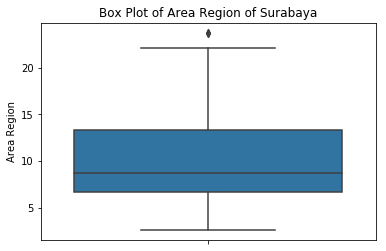

In [106]:
sns.boxplot(y = data_total['Area Region'])
plt.title('Box Plot of Area Region of Surabaya')
plt.show()

From this data we know that majority of neighborhood on Surabaya has Area Region between approx. 7 until approx. 13 km squared, while there are some outlier outside 20 km squared.

Let's gather data from Foursquare API to know what kind of places near the places.

In [107]:
CLIENT_ID = 'XJUM1W5ATB2OZVEUQFFYIUEWMCXG2YAHIPS4RR2CC1OMLAHG' # your Foursquare ID
CLIENT_SECRET = 'NSWSO5JTFE5C1KDRZRTSVJITQOHWKNSQTK2PK1TQ3UHLPFBV' # your Foursquare Secret
VERSION = '20180417' # Foursquare API version

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: XJUM1W5ATB2OZVEUQFFYIUEWMCXG2YAHIPS4RR2CC1OMLAHG
CLIENT_SECRET:NSWSO5JTFE5C1KDRZRTSVJITQOHWKNSQTK2PK1TQ3UHLPFBV


In [108]:
# get the longitude and latitude of neihborhood
neighborhood_latitude = data_total.loc[0, 'latitude'] # neighborhood latitude value
neighborhood_longitude = data_total.loc[0, 'longitude'] # neighborhood longitude value

neighborhood_name = data_total.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Tegalsari are -7.2798481, 112.7360686.


In [109]:
LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius since i am using 1 km equals 1,000 m
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=XJUM1W5ATB2OZVEUQFFYIUEWMCXG2YAHIPS4RR2CC1OMLAHG&client_secret=NSWSO5JTFE5C1KDRZRTSVJITQOHWKNSQTK2PK1TQ3UHLPFBV&v=20180417&ll=-7.2798481,112.7360686&radius=1000&limit=200'

In [110]:
# get json of that links
results = requests.get(url).json()

In [111]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [112]:
# get venues name, categories, latitude, and longitude
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name             categories       lat         lng
0                   Völks Coffee            Coffee Shop -7.281788  112.736857
1        Soto daging imam bonjol  Indonesian Restaurant -7.276836  112.735557
2                        Bon Ami                 Bakery -7.283387  112.735248
3  La Rucola Ristorante Italiano     Italian Restaurant -7.282881  112.737737
4               Cafesera Kartini             Food Court -7.279219  112.738307

In [113]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

97 venues were returned by Foursquare.


So there are 97 venues that gathered in Foursquare API.

In [114]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [115]:
# get venues is in what neighborhood
surabaya_venues = getNearbyVenues(names=data_total['Neighborhood'],
                                   latitudes=data_total['latitude'],
                                   longitudes=data_total['longitude']
                                  )

Tegalsari
Genteng
Bubutan
Simokerto
Pabean Cantikan
Semampir
Krembangan
Kenjeran
Bulak
Tambaksari
Gubeng
Rungkut
Tenggilis Mejoyo
Gunung Anyar
Sukolilo
Mulyorejo
Sawahan
Wonokromo
Karangpilang
Dukuh Pakis
Wiyung
Wonocolo
Gayungan
Jambangan
Tandes
Sukomanunggal
Asemrowo
Benowo
Pakal
Lakarsantri
Sambikerep


In [116]:
print(surabaya_venues.shape)
surabaya_venues.head()

(876, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Tegalsari              -7.279848              112.736069   
1    Tegalsari              -7.279848              112.736069   
2    Tegalsari              -7.279848              112.736069   
3    Tegalsari              -7.279848              112.736069   
4    Tegalsari              -7.279848              112.736069   

                           Venue  Venue Latitude  Venue Longitude  \
0                   Völks Coffee       -7.281788       112.736857   
1        Soto daging imam bonjol       -7.276836       112.735557   
2                        Bon Ami       -7.283387       112.735248   
3  La Rucola Ristorante Italiano       -7.282881       112.737737   
4               Cafesera Kartini       -7.279219       112.738307   

          Venue Category  
0            Coffee Shop  
1  Indonesian Restaurant  
2                 Bakery  
3     Italian Restaurant  
4             Food Court

There are 876 venues, so much.

In [117]:
surabaya_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                             
Asemrowo                              4                       4      4   
Benowo                                4                       4      4   
Bubutan                              52                      52     52   
Bulak                                 8                       8      8   
Dukuh Pakis                          21                      21     21   
Gayungan                             42                      42     42   
Genteng                             100                     100    100   
Gubeng                              100                     100    100   
Gunung Anyar                          7                       7      7   
Jambangan                            14                      14     14   
Karangpilang                          6                       6      6   
Kenjeran                              4                       4      4   
Krembangan                           10                      10     10   
Lakarsantri                           4                       4      4   
Mulyorejo                            33                      33     33   
Pabean Cantikan                      11                      11     11   
Pakal                                 5                       5      5   
Rungkut                               4                       4      4   
Sambikerep                            8                       8      8   
Sawahan                              33                      33     33   
Semampir                              2                       2      2   
Simokerto                            24                      24     24   
Sukolilo                              4                       4      4   
Sukomanunggal                        14                      14     14   
Tambaksari                           30                      30     30   
Tandes                                5                       5      5   
Tegalsari                            97                      97     97   
Tenggilis Mejoyo                     59                      59     59   
Wiyung                               13                      13     13   
Wonocolo                             69                      69     69   
Wonokromo                            89                      89     89   

                  Venue Latitude  Venue Longitude  Venue Category  
Neighborhood                                                       
Asemrowo                       4                4               4  
Benowo                         4                4               4  
Bubutan                       52               52              52  
Bulak                          8                8               8  
Dukuh Pakis                   21               21              21  
Gayungan                      42               42              42  
Genteng                      100              100             100  
Gubeng                       100              100             100  
Gunung Anyar                   7                7               7  
Jambangan                     14               14              14  
Karangpilang                   6                6               6  
Kenjeran                       4                4               4  
Krembangan                    10               10              10  
Lakarsantri                    4                4               4  
Mulyorejo                     33               33              33  
Pabean Cantikan               11               11              11  
Pakal                          5                5               5  
Rungkut                        4                4               4  
Sambikerep                     8                8               8  
Sawahan                       33               33              33  
Semampir                       2                2               2  
Simokerto  

In [118]:
print('There are {} uniques categories.'.format(len(surabaya_venues['Venue Category'].unique())))

There are 159 uniques categories.


Thats make sense, there are 159 unique categories from so many venues gathered.

In [119]:
sby_viz = surabaya_venues.reset_index(drop=True)
sby_viz.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Tegalsari              -7.279848              112.736069   
1    Tegalsari              -7.279848              112.736069   
2    Tegalsari              -7.279848              112.736069   
3    Tegalsari              -7.279848              112.736069   
4    Tegalsari              -7.279848              112.736069   

                           Venue  Venue Latitude  Venue Longitude  \
0                   Völks Coffee       -7.281788       112.736857   
1        Soto daging imam bonjol       -7.276836       112.735557   
2                        Bon Ami       -7.283387       112.735248   
3  La Rucola Ristorante Italiano       -7.282881       112.737737   
4               Cafesera Kartini       -7.279219       112.738307   

          Venue Category  
0            Coffee Shop  
1  Indonesian Restaurant  
2                 Bakery  
3     Italian Restaurant  
4             Food Court

Let's create visualization of them.

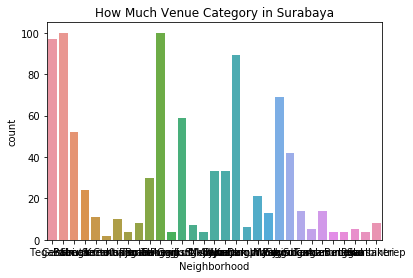

In [120]:
sns.countplot(sby_viz['Neighborhood'])
plt.title('How Much Venue Category in Surabaya')
plt.show()

Since it's not good, let's change our data so that can create better viz.

In [121]:
# create count of every neigborhood
sby_viz = pd.DataFrame(sby_viz.groupby('Neighborhood')['Neighborhood'].count())

In [122]:
# change column name
sby_viz.columns = ['Count']
sby_viz.head()

Count
Neighborhood       
Asemrowo          4
Benowo            4
Bubutan          52
Bulak             8
Dukuh Pakis      21

In [123]:
# reset index of data
sby_viz = sby_viz.reset_index()
sby_viz.head()

Neighborhood  Count
0     Asemrowo      4
1       Benowo      4
2      Bubutan     52
3        Bulak      8
4  Dukuh Pakis     21

In [124]:
# sorting descending from most venues
sby_viz = sby_viz.sort_values('Count', ascending=False)

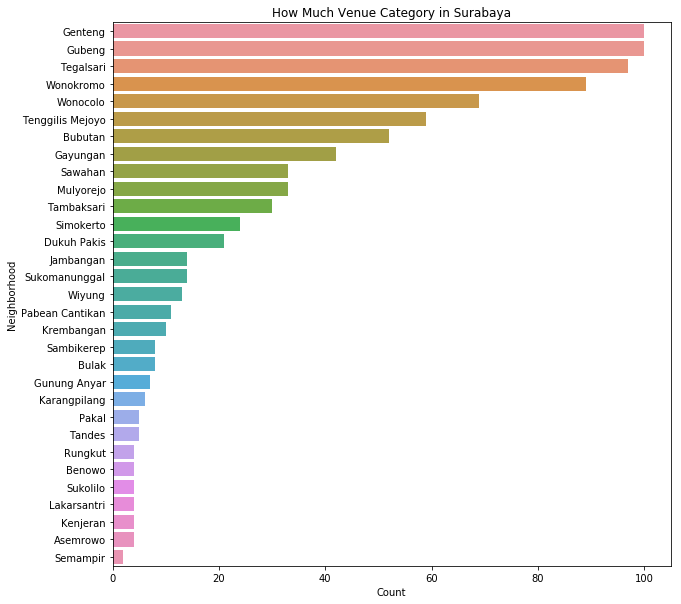

In [125]:
# create visualization
plt.figure(figsize=(10,10))
sns.barplot(x = 'Count', y = 'Neighborhood', data= sby_viz)
plt.title('How Much Venue Category in Surabaya')
plt.show()

Analyze **surabaya_venues** itself.

In [126]:
# one hot encoding
surabaya_onehot = pd.get_dummies(surabaya_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
surabaya_onehot['Neighborhood'] = surabaya_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [surabaya_onehot.columns[-1]] + list(surabaya_onehot.columns[:-1])
surabaya_onehot = surabaya_onehot[fixed_columns]

surabaya_onehot.head()

Neighborhood  Accessories Store  American Restaurant  Arcade  \
0    Tegalsari                  0                    0       0   
1    Tegalsari                  0                    0       0   
2    Tegalsari                  0                    0       0   
3    Tegalsari                  0                    0       0   
4    Tegalsari                  0                    0       0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0                    0                 0                   0   
1                    0                 0                   0   
2                    0                 0                   0   
3                    0                 0                   0   
4                    0                 0                   0   

   Australian Restaurant  Automotive Shop  BBQ Joint  Bakery  \
0                      0                0          0       0   
1                      0                0          0       0   
2                      0                0          0       1   
3                      0                0          0       0   
4                      0                0          0       0   

   Balinese Restaurant  Bar  Basketball Court  Batik Shop  Beach  \
0                    0    0                 0           0      0   
1                    0    0                 0           0      0   
2                    0    0                 0           0      0   
3                    0    0                 0           0      0   
4                    0    0                 0           0      0   

   Bed & Breakfast  Bistro  Board Shop  Boarding House  Boat or Ferry  \
0                0       0           0               0              0   
1                0       0           0               0              0   
2                0       0           0               0              0   
3                0       0           0               0              0   
4                0       0           0               0              0   

   Bookstore  Boutique  Breakfast Spot  Bridal Shop  Bridge  Bubble Tea Shop  \
0          0         0               0            0       0                0   
1          0         0               0            0       0                0   
2          0         0               0            0       0                0   
3          0         0               0            0       0                0   
4          0         0               0            0       0                0   

   Buffet  Building  Burger Joint  Bus Station  Business Service  Cafeteria  \
0       0         0             0            0                 0          0   
1       0         0             0            0                 0          0   
2       0         0             0            0                 0          0   
3       0         0             0            0                 0          0   
4       0         0             0            0                 0          0   

   Café  Camera Store  Cantonese Restaurant  Chinese Restaurant  \
0     0             0                     0                   0   
1     0             0                     0                   0   
2     0             0                     0                   0   
3     0             0                     0                   0   
4     0             0                     0                   0   

   Clothing Store  Cocktail Bar  Coffee Shop  Comfort Food Restaurant  \
0               0             0            1                        0   
1               0             0            0                        0   
2               0             0            0                        0   
3               0             0            0                        0   
4               0             0            0                        0   

   Convenience Store  Cosmetics Shop  Cupcake Shop  Department Store  \
0                  0               0             0                 0   
1                  0               0         

In [127]:
surabaya_grouped = surabaya_onehot.groupby('Neighborhood').mean().reset_index()
surabaya_grouped

Neighborhood  Accessories Store  American Restaurant    Arcade  \
0           Asemrowo               0.00             0.000000  0.000000   
1             Benowo               0.00             0.000000  0.000000   
2            Bubutan               0.00             0.000000  0.000000   
3              Bulak               0.00             0.000000  0.000000   
4        Dukuh Pakis               0.00             0.000000  0.000000   
5           Gayungan               0.00             0.000000  0.023810   
6            Genteng               0.00             0.010000  0.000000   
7             Gubeng               0.01             0.020000  0.000000   
8       Gunung Anyar               0.00             0.000000  0.000000   
9          Jambangan               0.00             0.000000  0.000000   
10      Karangpilang               0.00             0.000000  0.000000   
11          Kenjeran               0.00             0.000000  0.000000   
12        Krembangan               0.00             0.000000  0.100000   
13       Lakarsantri               0.00             0.000000  0.000000   
14         Mulyorejo               0.00             0.000000  0.000000   
15   Pabean Cantikan               0.00             0.000000  0.000000   
16             Pakal               0.00             0.000000  0.000000   
17           Rungkut               0.00             0.000000  0.000000   
18        Sambikerep               0.00             0.000000  0.000000   
19           Sawahan               0.00             0.000000  0.000000   
20          Semampir               0.00             0.000000  0.000000   
21         Simokerto               0.00             0.000000  0.041667   
22          Sukolilo               0.25             0.250000  0.000000   
23     Sukomanunggal               0.00             0.000000  0.000000   
24        Tambaksari               0.00             0.000000  0.000000   
25            Tandes               0.00             0.000000  0.000000   
26         Tegalsari               0.00             0.000000  0.000000   
27  Tenggilis Mejoyo               0.00             0.000000  0.000000   
28            Wiyung               0.00             0.000000  0.000000   
29          Wonocolo               0.00             0.000000  0.000000   
30         Wonokromo               0.00             0.011236  0.000000   

    Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0              0.000000          0.000000               0.000   
1              0.000000          0.000000               0.000   
2              0.000000          0.000000               0.000   
3              0.000000          0.000000               0.125   
4              0.047619          0.047619               0.000   
5              0.023810          0.000000               0.000   
6              0.000000          0.010000               0.000   
7              0.010000          0.020000               0.000   
8              0.000000          0.000000               0.000   
9              0.000000          0.000000               0.000   
10             0.000000          0.000000               0.000   
11             0.000000          0.000000               0.000   
12             0.000000          0.000000               0.000   
13             0.000000          0.000000               0.000   
14             0.000000          0.000000               0.000   
15             0.000000          0.090909               0.000   
16             0.000000          0.200000               0.000   
17             0.000000          0.000000               0.000   
18             0.000000          0.000000               0.000   
19             0.000000          0.000000               0.000   
20             0.000000          0.000000               0.000   
21             0.000000          0.000000               0.000   
22             0.000000          0.000000               0.000   
23             0.000000          0.000000               0.000   
24            

In [128]:
# check top 3 venuse for every neighborhood
num_top_venues = 3

for hood in surabaya_grouped['Neighborhood']:
    print("---",hood,"-----")
    temp = surabaya_grouped[surabaya_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

--- Asemrowo -----
                venue  freq
0           Cafeteria  0.25
1  Seafood Restaurant  0.25
2     Harbor / Marina  0.25


--- Benowo -----
                   venue  freq
0                   Café  0.25
1  Indonesian Restaurant  0.25
2             Shoe Store  0.25


--- Bubutan -----
                   venue  freq
0    Fried Chicken Joint  0.08
1  Indonesian Restaurant  0.08
2             Food Truck  0.08


--- Bulak -----
               venue  freq
0              Beach  0.12
1               Food  0.12
2  Convenience Store  0.12


--- Dukuh Pakis -----
                       venue  freq
0      Indonesian Restaurant  0.19
1         Seafood Restaurant  0.14
2  Indonesian Meatball Place  0.05


--- Gayungan -----
                   venue  freq
0  Indonesian Restaurant  0.19
1             Food Truck  0.10
2      Convenience Store  0.07


--- Genteng -----
                   venue  freq
0            Coffee Shop  0.10
1  Indonesian Restaurant  0.08
2                  Hotel  0.07


-

That's interesting, since that every neighborhood has different top venue.

In [129]:
# let's store it to DataFrame
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [130]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = surabaya_grouped['Neighborhood']

for ind in np.arange(surabaya_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(surabaya_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood  1st Most Common Venue 2nd Most Common Venue  \
0     Asemrowo     Seafood Restaurant       Harbor / Marina   
1       Benowo             Shoe Store                  Café   
2      Bubutan  Indonesian Restaurant            Food Truck   
3        Bulak                   Food     Convenience Store   
4  Dukuh Pakis  Indonesian Restaurant    Seafood Restaurant   

       3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
0                 Toll Booth             Cafeteria                   Zoo  
1      Indonesian Restaurant           Bus Station                   Zoo  
2        Fried Chicken Joint     Convenience Store    Chinese Restaurant  
3         Athletics & Sports                  Pool                  Café  
4  Indonesian Meatball Place              Building            Restaurant

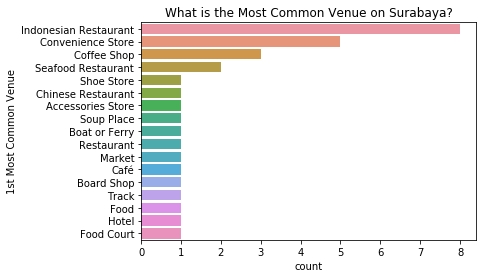

In [131]:
# create visualization
sns.countplot(y=neighborhoods_venues_sorted['1st Most Common Venue'], 
              order = neighborhoods_venues_sorted['1st Most Common Venue'].value_counts().index)
plt.title('What is the Most Common Venue on Surabaya?')
plt.show()

With 8 of 31 Neighborhoods, **Indonesian Restaurant** is dominated what is the most common venue on Surabaya.

It's time for cluster the neighborhood.

In [132]:
surabaya_grouped_clustering = surabaya_grouped.drop('Neighborhood', 1)

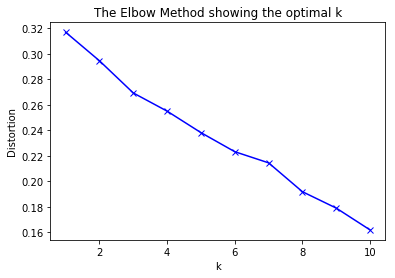

In [133]:
# using K-Means to get cluster
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(surabaya_grouped_clustering)
    #kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(surabaya_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / surabaya_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Since it is hard to make what is good k-, so I decided to 3 cluster, because if I choose 8, there are so much cluster and maybe it's hard to interpret.

In [134]:
# set number of clusters
kclusters = 3

surabaya_grouped_clustering = surabaya_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(surabaya_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [135]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

surabaya_merged = data_total

# merge surabaya_grouped with surabaya_data to add latitude/longitude for each neighborhood
surabaya_merged = surabaya_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

surabaya_merged.head() # check the last columns!

Neighborhood  Area Region  latitude   longitude  Cluster Labels  \
0        Tegalsari         4.29 -7.279848  112.736069               1   
1          Genteng         4.05 -7.259088  112.747986               1   
2          Bubutan         3.86 -7.249960  112.730110               1   
3        Simokerto         2.59 -7.238650  112.753940               1   
4  Pabean Cantikan         6.80 -7.214750  112.730110               1   

   1st Most Common Venue  2nd Most Common Venue 3rd Most Common Venue  \
0  Indonesian Restaurant      Convenience Store           Coffee Shop   
1            Coffee Shop  Indonesian Restaurant                 Hotel   
2  Indonesian Restaurant             Food Truck   Fried Chicken Joint   
3     Seafood Restaurant             Food Court            Food Truck   
4          Boat or Ferry      Convenience Store                  Pier   

   4th Most Common Venue 5th Most Common Venue  
0                 Bakery                  Café  
1           Noodle House                  Café  
2      Convenience Store    Chinese Restaurant  
3  Indonesian Restaurant            Restaurant  
4                 Market            Restaurant

Ah, I forget to add additional files, called **Kecamatan_Surabaya.geojson**. So, actually this data is a geojson so that we can know shape of our maps, for this you can check it [here](https://drive.google.com/drive/folders/1bhU7U4jiynEjMyRW2qPvBeenaLrqiR5h?usp=drive_open). Let's add it.

In [136]:
world_geo = r'Kecamatan_Surabaya.geojson' # geojson file

Let's create color difference for diffent value of Area Region.

In [137]:
# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(surabaya_merged['Area Region'].min(),
                              surabaya_merged['Area Region'].max(),
                              6, dtype=float)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

Last but not least, get this map done.

In [138]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
map_clusters.choropleth(
    geo_data = world_geo,
    data=surabaya_merged,
    columns=['Neighborhood','Area Region'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Area Region',
    reset=True
)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, first in zip(surabaya_merged['latitude'], surabaya_merged['longitude'], surabaya_merged['Neighborhood'], surabaya_merged['Cluster Labels'], surabaya_merged['1st Most Common Venue']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + ' Most Common Venues: ' + str(first), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
    

       
map_clusters

# Results and Discussion <a name="results"></a>
After so much time consuming, finally we can get the result. Our analysis show that it's great to know that with how much your area is, it is still doesnt't have any impact, except for Indonesian Restaurant that they are spread out to 8 in 31 neighborhood to make it top places in Surabaya.

In [139]:
sby_viz_2 = surabaya_merged[['Neighborhood','Area Region']]
sby_data  = sby_viz.merge(sby_viz_2,
             how='inner',
             on='Neighborhood')
sby_data.corr()

Count  Area Region
Count        1.000000    -0.494079
Area Region -0.494079     1.000000

For this, we can assume that impact of area region is slightly to negative correlation, which is when Area Region is big, count of venues is less, and when count of venues is more, Area Region is not big enough. It make sense that there are many neighborhood is very dense.

In [140]:
sby_data['Average density'] = round(sby_data['Area Region'] / sby_data['Count'], 2)
sby_data = sby_data.sort_values('Average density')
sby_data

Neighborhood  Count  Area Region  Average density
0            Genteng    100         4.05             0.04
2          Tegalsari     97         4.29             0.04
6            Bubutan     52         3.86             0.07
1             Gubeng    100         7.99             0.08
5   Tenggilis Mejoyo     59         5.52             0.09
3          Wonokromo     89         8.47             0.10
4           Wonocolo     69         6.77             0.10
11         Simokerto     24         2.59             0.11
7           Gayungan     42         6.07             0.14
8            Sawahan     33         6.93             0.21
10        Tambaksari     30         8.99             0.30
13         Jambangan     14         4.19             0.30
9          Mulyorejo     33        14.21             0.43
12       Dukuh Pakis     21         9.94             0.47
16   Pabean Cantikan     11         6.80             0.62
14     Sukomanunggal     14         9.23             0.66
17        Krembangan     10         8.34             0.83
19             Bulak      8         6.72             0.84
15            Wiyung     13        12.46             0.96
20      Gunung Anyar      7         9.71             1.39
21      Karangpilang      6         9.23             1.54
28          Kenjeran      4         7.77             1.94
23            Tandes      5        11.07             2.21
18        Sambikerep      8        23.68             2.96
29          Asemrowo      4        15.44             3.86
30          Semampir      2         8.76             4.38
22             Pakal      5        22.07             4.41
27       Lakarsantri      4        18.99             4.75
24           Rungkut      4        21.08             5.27
26          Sukolilo      4        23.68             5.92
25            Benowo      4        23.73             5.93

From this data we absolutely know that in **Genteng** and **Tegalsari** is very crowded with just 0,04 km squared per each venue. While only 12 from 31 has density above 1 km squared. In some neighborhood is so dense, some of them not.

# Conclusion <a name="conclusion"></a>
So after looking at the maps above and the data itself. It is clear that Surabaya is dense, when you sample just 2  or more neigborhood, such as **Tegalsari** and **Genteng**. But if you see in depth, there are some land that we can build something. If you want to start your businesses, go ahead for Indonesian Restaurant. You can build something that can improve economy of each neighborhood. Maybe in some places there are few venus gathered because the data is not complete or what kind of else problem. But in this I assume that we need more venues, but not in dense neighborhood. Take a look at **Lakarsantri, Rungkut, Sukolilo, and Benowo***. Thank you for reading until the end.